## 第5章: Naive-vs-IPS

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import torch
from torch.optim import Adam
from pytorchltr.datasets import MSLR30K

from model import MLPScoreFunc
from train import train_ranker

In [2]:
# 実験設定
batch_size = 32
hidden_layer_sizes = (10,10)
learning_rate = 0.0001
n_epochs = 200

In [3]:
# MSLR30Kデータセットを読み込む（初回だけ時間がかかる）
train = MSLR30K(split="train")
test = MSLR30K(split="test")

## ナイーブ推定量に基づくMLPRankerの学習

In [4]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)
optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_naive = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer, 
    estimator="naive",
    objective="via-rec",
    train=train,
    test=test,
    batch_size=batch_size,
    n_epochs=n_epochs,
)

100%|██████████| 200/200 [26:45<00:00,  8.03s/it]


## IPS推定量に基づくMLPRankerの学習

In [5]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)
optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_ips = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer,
    estimator="ips-via-rec",
    objective="via-rec",
    train=train,
    test=test,
    batch_size=batch_size,
    n_epochs=n_epochs,
)

100%|██████████| 200/200 [26:57<00:00,  8.09s/it]


## 学習曲線の描画（図5.5）

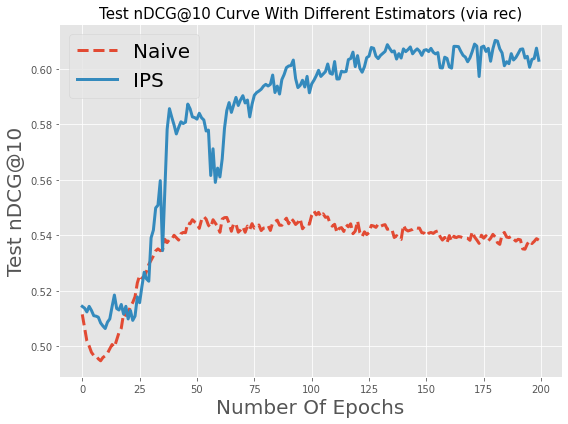

In [6]:
plt.subplots(1, figsize=(8,6))
plt.plot(range(n_epochs), ndcg_score_list_naive, label="Naive", linewidth=3, linestyle="dashed")
plt.plot(range(n_epochs), ndcg_score_list_ips, label="IPS", linewidth=3)
   
plt.title("Test nDCG@10 Curve With Different Estimators (via rec)", fontdict=dict(size=15))
plt.xlabel("Number Of Epochs", fontdict=dict(size=20))
plt.ylabel("Test nDCG@10", fontdict=dict(size=20))
plt.tight_layout()
plt.legend(loc="best", fontsize=20)
plt.show()